6151.887549783826 12193.966557121492


/tmp/ipykernel_10802/4227808823.py:81: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


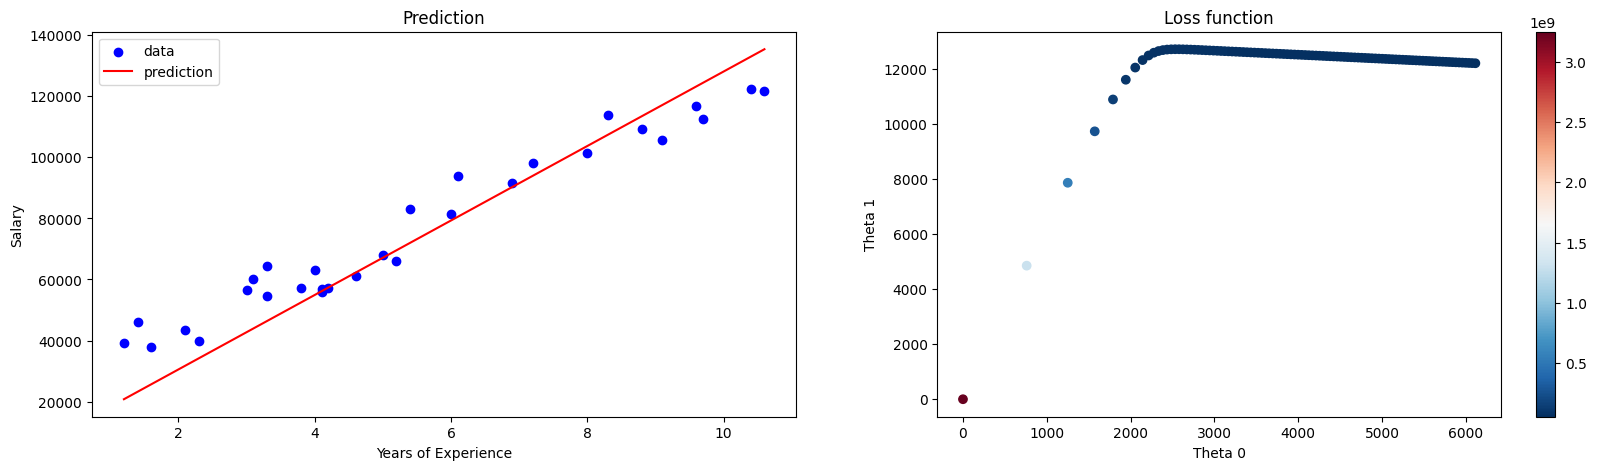

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def hypothesis(theta_0, theta_1, x):
    y_pred = theta_0 + (theta_1 * x)
    return(y_pred)

def CostFunction(theta_0, theta_1, x, y):
    s = 0
    m = len(x)
    for (i,j) in list(zip(x,y)):
        s += ((hypothesis(theta_0, theta_1, i) - j)**2)
    error = s/(2*m)
    return(error)

def GradientDescent(theta_0, theta_1, x, y, learning_rate):
    s0 = 0
    s1 = 0
    m = len(x)
    for (i,j) in list(zip(x, y)):
        s0 += (hypothesis(theta_0, theta_1, i) - j)
        s1 += ((hypothesis(theta_0, theta_1, i) - j)*(i))
    temp0 = theta_0 - (learning_rate * (s0/m))
    temp1 = theta_1 - (learning_rate * (s1/m))

    theta_0 = temp0
    theta_1 = temp1

    return(theta_0, theta_1)


df = pd.read_csv("/mnt/c/LinearRegression/Salary_dataset.csv") #Directory can be changed here

del df['Unnamed: 0']

X = list(df['YearsExperience'])
Y = list(df['Salary'])

t0 = 0
t1 = 0

loss = []

t_0 = []
t_1 = []

for j in range(100):
    l = CostFunction(t0, t1, X, Y)
    loss.append(l)
    t_0.append(t0)
    t_1.append(t1)
    t0, t1 = GradientDescent(t0, t1, X, Y, 0.01)

new_t0 = t0
new_t1 = t1

print(new_t0, new_t1)

new_Y = []

for i in X:
    y_pred = hypothesis(new_t0, new_t1, i)
    new_Y.append(y_pred)


subscript_numbers = '₀₁₂₃₄₅₆₇₈₉'

def subscript_number(number):
    return ''.join(subscript_numbers[int(digit)] for digit in str(number))

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].scatter(X, Y, color='blue', label='data')
ax[0].plot(X, new_Y, color='red', label='prediction')
ax[0].set_xlabel('Years of Experience')
ax[0].set_ylabel('Salary')
ax[0].set_title('Prediction')
ax[0].legend()

g = ax[1].scatter(t_0, t_1, c=loss, cmap='RdBu_r')
fig.colorbar(g, ax=ax[1])
ax[1].set_xlabel(f'θ {subscript_number(0)}')
ax[1].set_ylabel(f'θ {subscript_number(1)}')
ax[1].set_title('Loss function')

fig.show()